In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

In [3]:
df=pd.read_csv("C:\\Users\\hp\\Documents\\MGP\\Site_energy_predicton\\Dataset\\train_dataset.csv")
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

id: building id

Year_Factor: anonymized year in which the weather and energy usage factors were observed

State_Factor: anonymized state in which the building is located

building_class: building classification

facility_type: building usage type

floor_area: floor area (in square feet) of the building

year_built: year in which the building was constructed

energy_star_rating: the energy star rating of the building

ELEVATION: elevation of the building location

january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building

january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building

january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building

cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

precipitation_inches: annual precipitation in inches at the location of the building

snowfall_inches: annual snowfall in inches at the location of the building

snowdepth_inches: annual snow depth in inches at the location of the building

avg_temp: average temperature over a year at the location of the building

days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building

days_below_20F: total number of days below 20 degrees Fahrenheit at the location of the building

days_below_10F: total number of days below 10 degrees Fahrenheit at the location of the building

days_below_0F: total number of days below 0 degrees Fahrenheit at the location of the building

days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building

days_above_90F: total number of days above 90 degrees Fahrenheit at the location of the building

days_above_100F: total number of days above 100 degrees Fahrenheit at the location of the building

days_above_110F: total number of days above 110 degrees Fahrenheit at the location of the building

direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

max_wind_speed: maximum wind speed at the location of the building

days_with_fog: number of days with fog at the location of the building

Target
site_eui: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

In [7]:
na_col=[]
missing_values=np.round(((df.isna().sum())/75757)*100,2)
for i in range(0,64):
    if(missing_values[i]!=0):
        na_col.append(df.columns[i])
        print(df.columns[i]," = ",missing_values[i],"%")

year_built  =  2.42 %
energy_star_rating  =  35.26 %
direction_max_wind_speed  =  54.23 %
direction_peak_wind_speed  =  55.19 %
max_wind_speed  =  54.23 %
days_with_fog  =  60.45 %


In [4]:
cat_col=[col for col in df.columns if df[col].dtype==object]
print(cat_col)

['State_Factor', 'building_class', 'facility_type']


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='building_class', ylabel='count'>

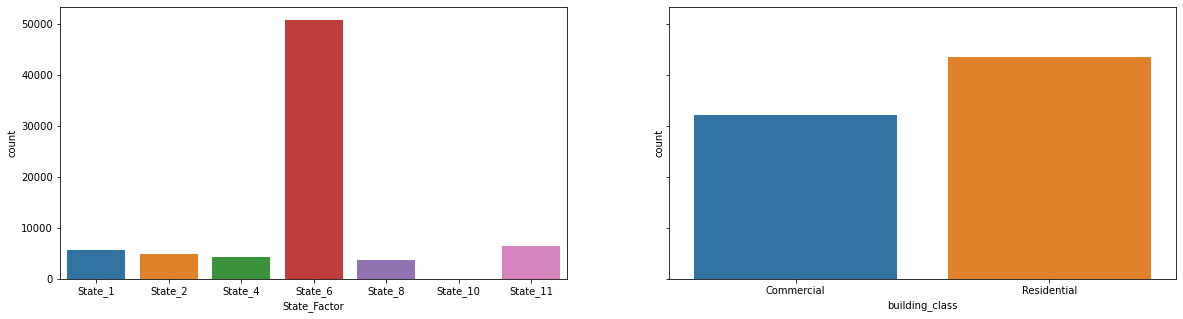

In [5]:
fig,ax=plt.subplots(1,2,figsize=(20,5),sharey=True)
#plt.xticks(fontsize=15,rotation=90)
sns.countplot(df["State_Factor"],ax=ax[0])
sns.countplot(df["building_class"],ax=ax[1])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='facility_type', ylabel='count'>

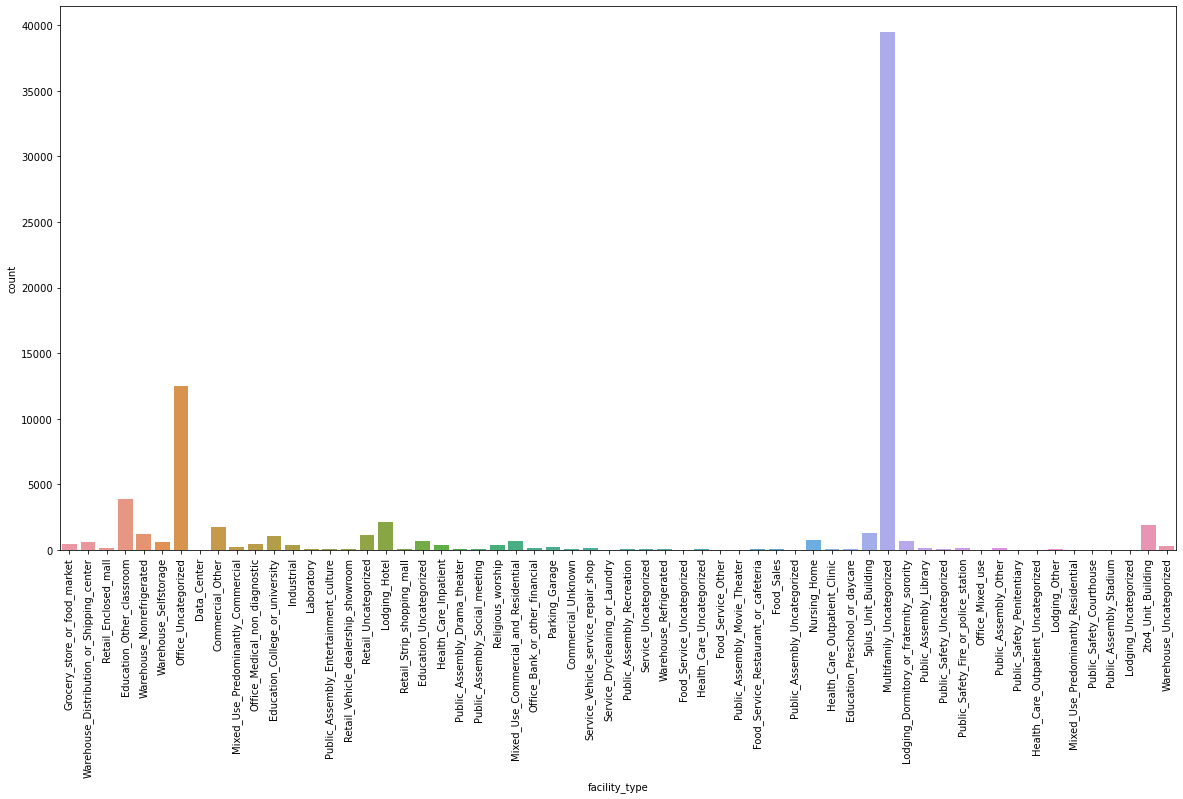

In [15]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=10,rotation=90)
sns.countplot(df["facility_type"])

Most of the sites are from State_6 and most of the facility are of Multifamily Uncategorized type

[Text(0, 0, 'Grocery_store_or_food_market'),
 Text(1, 0, 'Warehouse_Distribution_or_Shipping_center'),
 Text(2, 0, 'Retail_Enclosed_mall'),
 Text(3, 0, 'Education_Other_classroom'),
 Text(4, 0, 'Warehouse_Nonrefrigerated'),
 Text(5, 0, 'Warehouse_Selfstorage'),
 Text(6, 0, 'Office_Uncategorized'),
 Text(7, 0, 'Data_Center'),
 Text(8, 0, 'Commercial_Other'),
 Text(9, 0, 'Mixed_Use_Predominantly_Commercial'),
 Text(10, 0, 'Office_Medical_non_diagnostic'),
 Text(11, 0, 'Education_College_or_university'),
 Text(12, 0, 'Industrial'),
 Text(13, 0, 'Laboratory'),
 Text(14, 0, 'Public_Assembly_Entertainment_culture'),
 Text(15, 0, 'Retail_Vehicle_dealership_showroom'),
 Text(16, 0, 'Retail_Uncategorized'),
 Text(17, 0, 'Lodging_Hotel'),
 Text(18, 0, 'Retail_Strip_shopping_mall'),
 Text(19, 0, 'Education_Uncategorized'),
 Text(20, 0, 'Health_Care_Inpatient'),
 Text(21, 0, 'Public_Assembly_Drama_theater'),
 Text(22, 0, 'Public_Assembly_Social_meeting'),
 Text(23, 0, 'Religious_worship'),
 Text(2

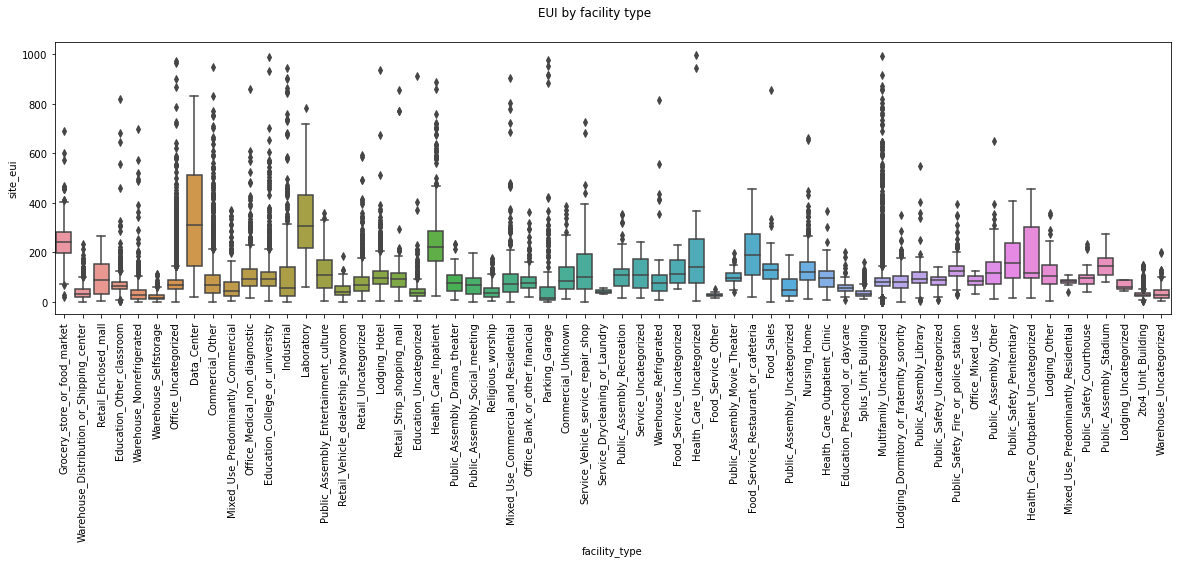

In [26]:
fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("EUI by facility type")
ax=sns.boxplot(data=df, y='site_eui', x='facility_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Labs,Data Centers,Health Care Centers, Food Servicing centers have higher range of site eui values

In [2]:
temp=[]
for col in df.columns:
    if ( "temp" in col):
        temp.append(col)
print(temp)

NameError: name 'df' is not defined

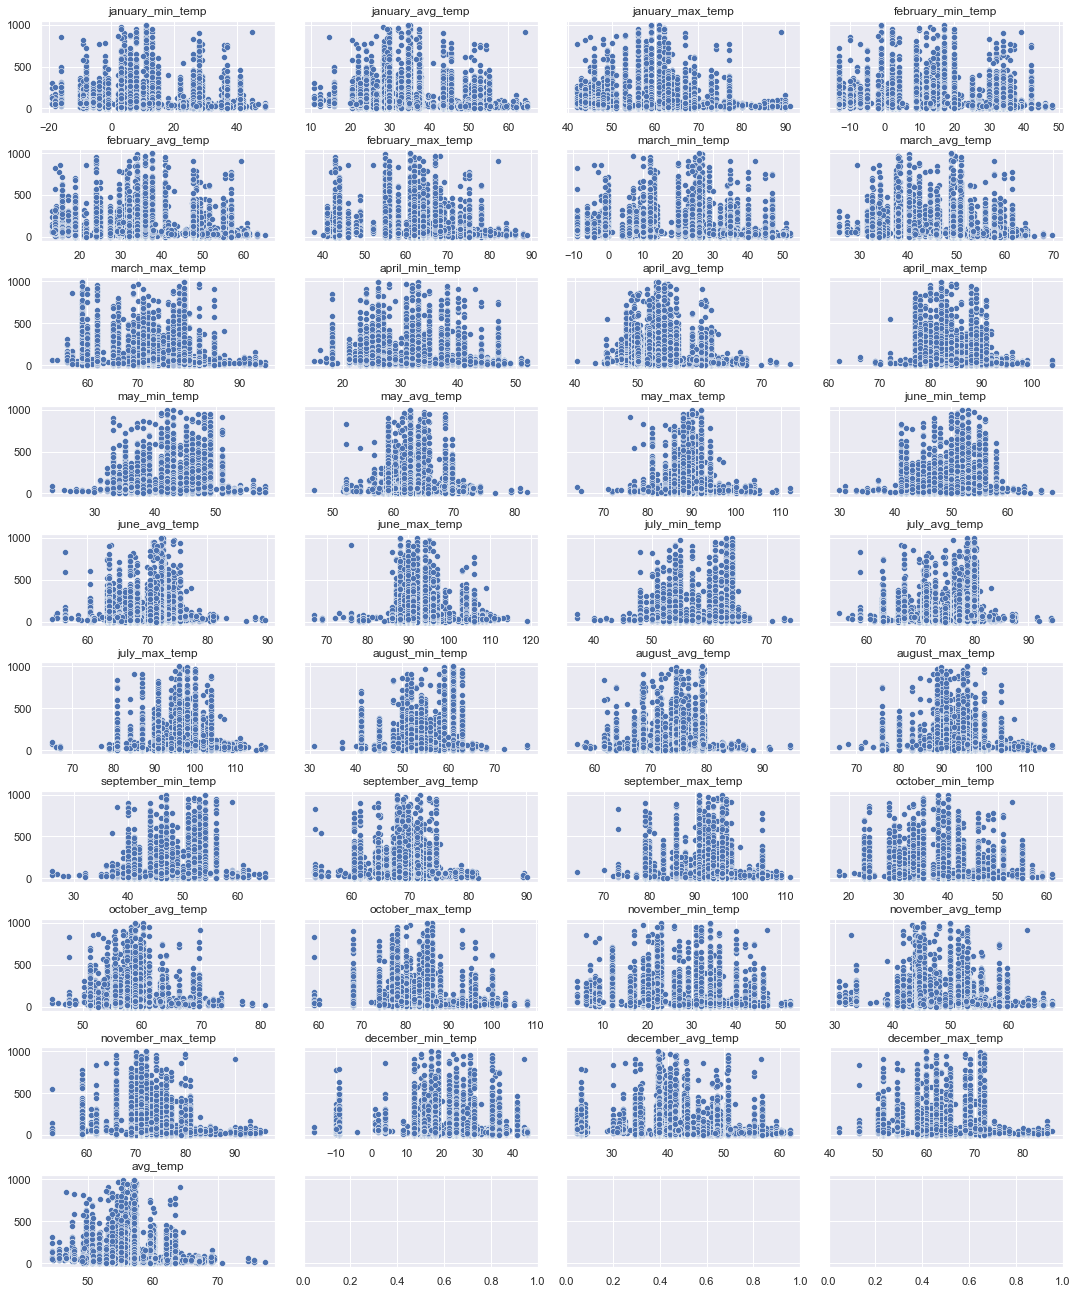

In [53]:
fig,ax=plt.subplots(10,4,figsize=(15,18),sharey=True)
fig.tight_layout()
sns.set_style("darkgrid")
for i,col in enumerate(temp):
    sns.scatterplot(x=df[col],y=df["site_eui"],ax=ax[int(i/4),i%4])\
    .set(title=col,ylabel=None,xlabel=None);

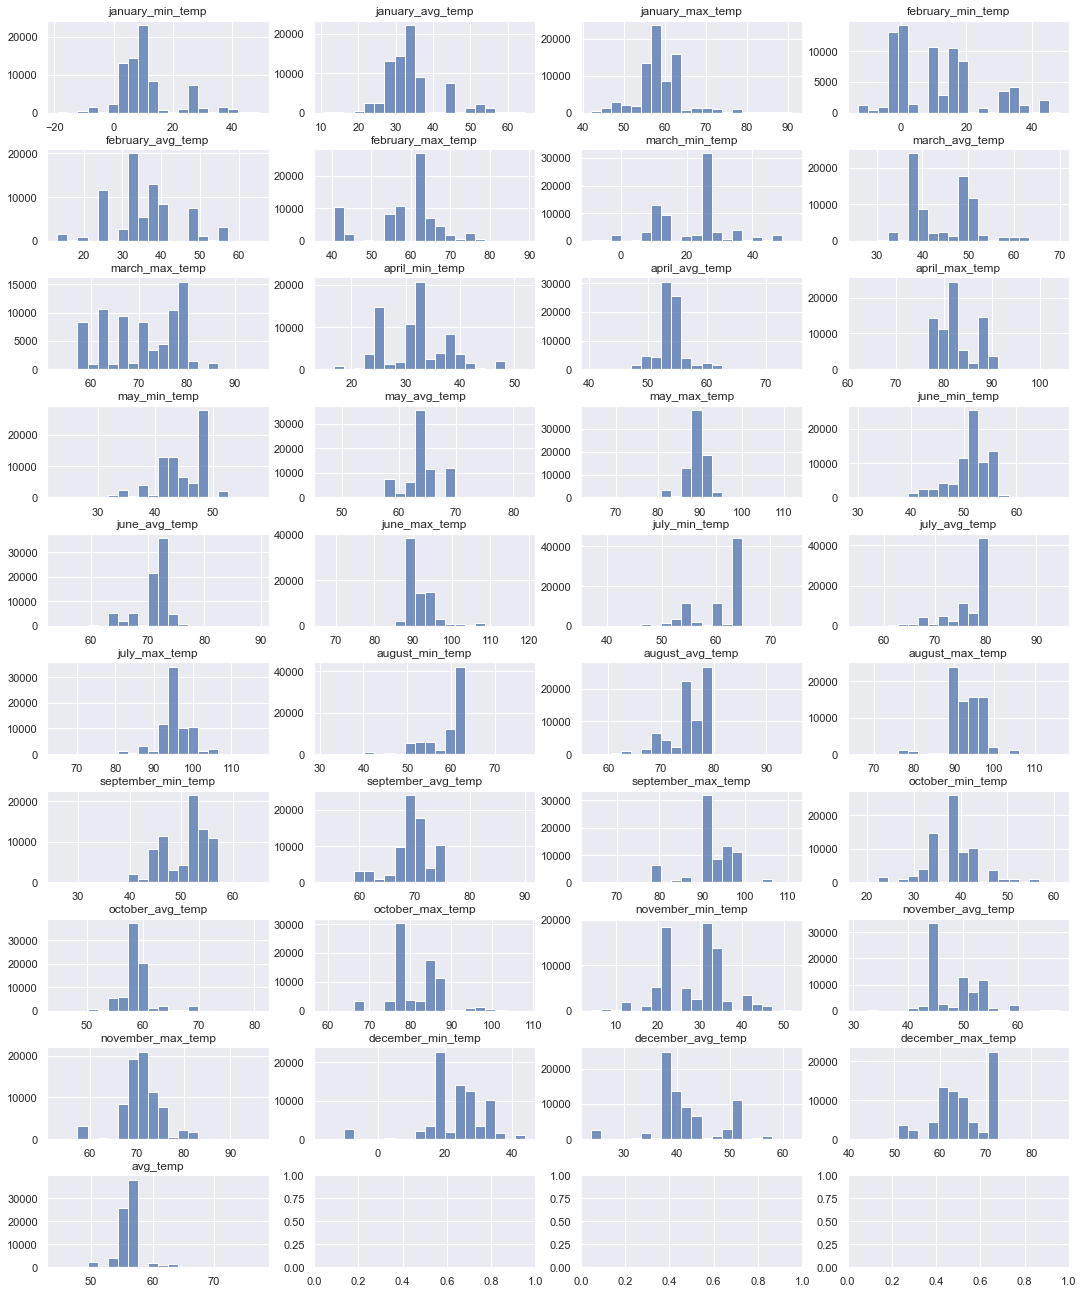

In [57]:
fig,ax=plt.subplots(10,4,figsize=(15,18))
fig.tight_layout()
sns.set_style("darkgrid")
for i,col in enumerate(temp):
    sns.histplot(x=df[col],bins=20,ax=ax[int(i/4),i%4])\
    .set(title=col,ylabel=None,xlabel=None);

In [4]:
winter=["december_avg_temp","january_avg_temp","february_avg_temp"]
spring=["march_avg_temp","april_avg_temp"]
summer=["may_avg_temp","june_avg_temp","july_avg_temp","august_avg_temp"]
autumn=["september_avg_temp","november_avg_temp"]
winter_min=["december_min_temp","january_min_temp","february_min_temp"]
spring_min=["march_min_temp","april_min_temp"]
summer_min=["may_min_temp","june_min_temp","july_min_temp","august_min_temp"]
autumn_min=["september_min_temp","november_min_temp"]
winter_max=["december_max_temp","january_max_temp","february_max_temp"]
spring_max=["march_max_temp","april_max_temp"]
summer_max=["may_max_temp","june_max_temp","july_max_temp","august_max_temp"]
autumn_max=["september_max_temp","november_max_temp"]

#df["winter_avg_temp"]=df[winter].mean()
#df["summer_avg_temp"]=df[summer].mean()
#df["spring_avg_temp"]=df[spring].mean()
#df["autumn_avg_temp"]=df[autumn].mean()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

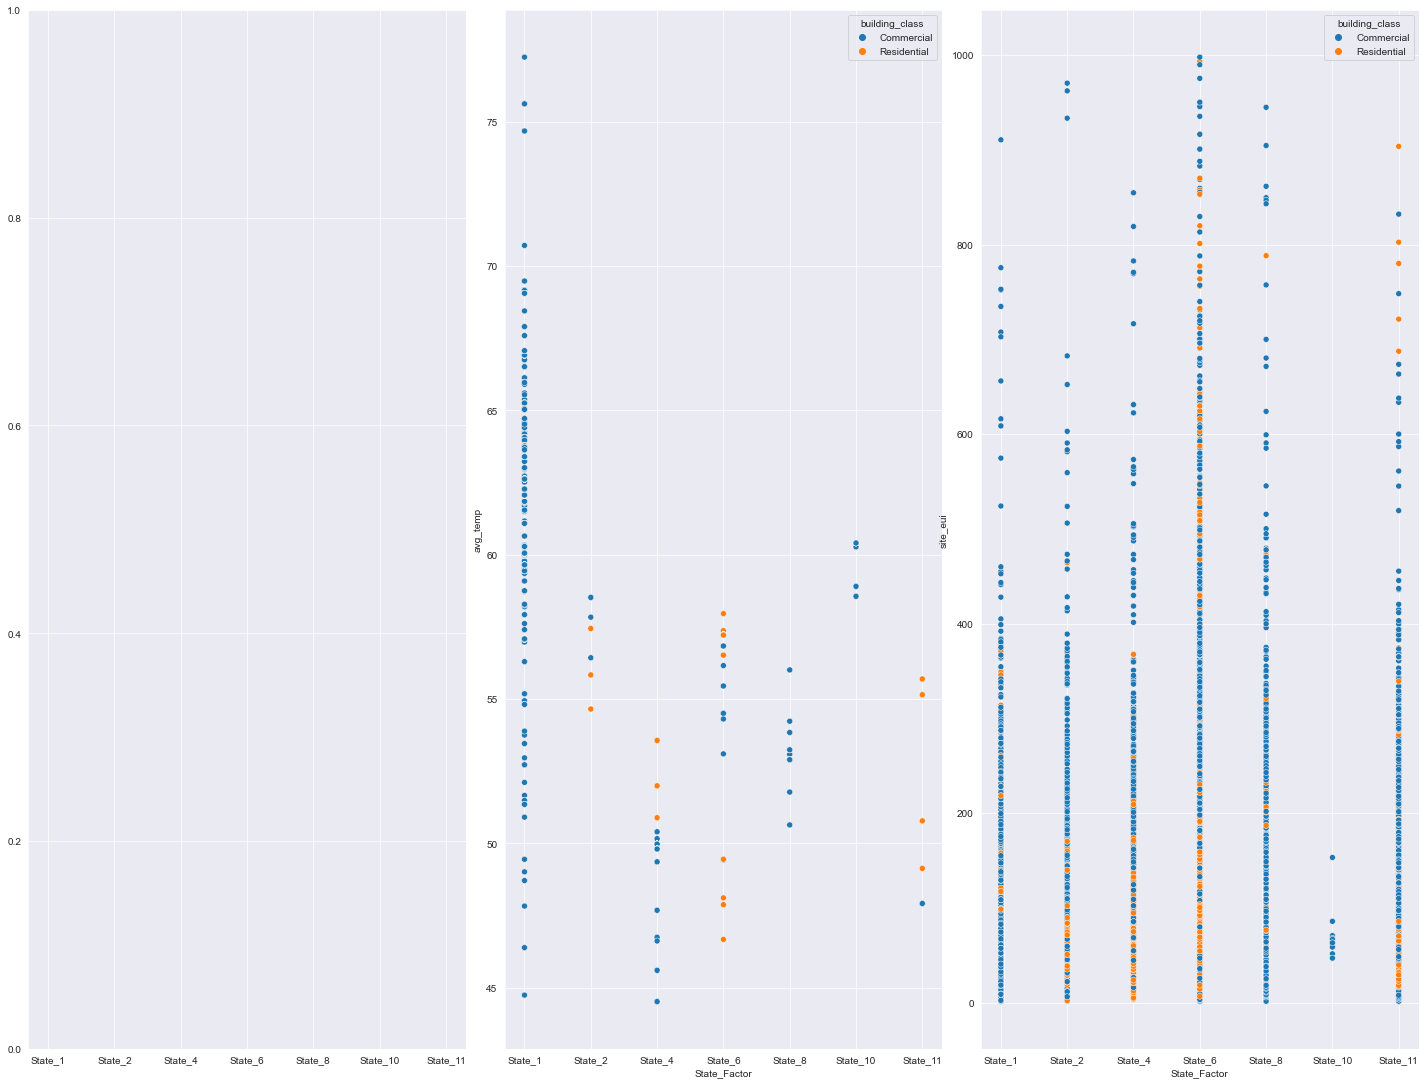

In [7]:
sns.set_style("darkgrid")
fig,ax=plt.subplots(1,3,figsize=(20,15),sharex=True)
fig.tight_layout()
#sns.scatterplot(df["State_Factor"],df["ELEVATION"],ax=[0])
sns.scatterplot(df["State_Factor"],df["avg_temp"],hue=df["building_class"],ax=ax[1])
sns.scatterplot(df["State_Factor"],df["site_eui"],hue=df["building_class"],ax=ax[2])

In [8]:
days_col=[]
for col in df.columns:
    if("days" in col):
        days_col.append(col)
print(days_col)

['cooling_degree_days', 'heating_degree_days', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F', 'days_with_fog']


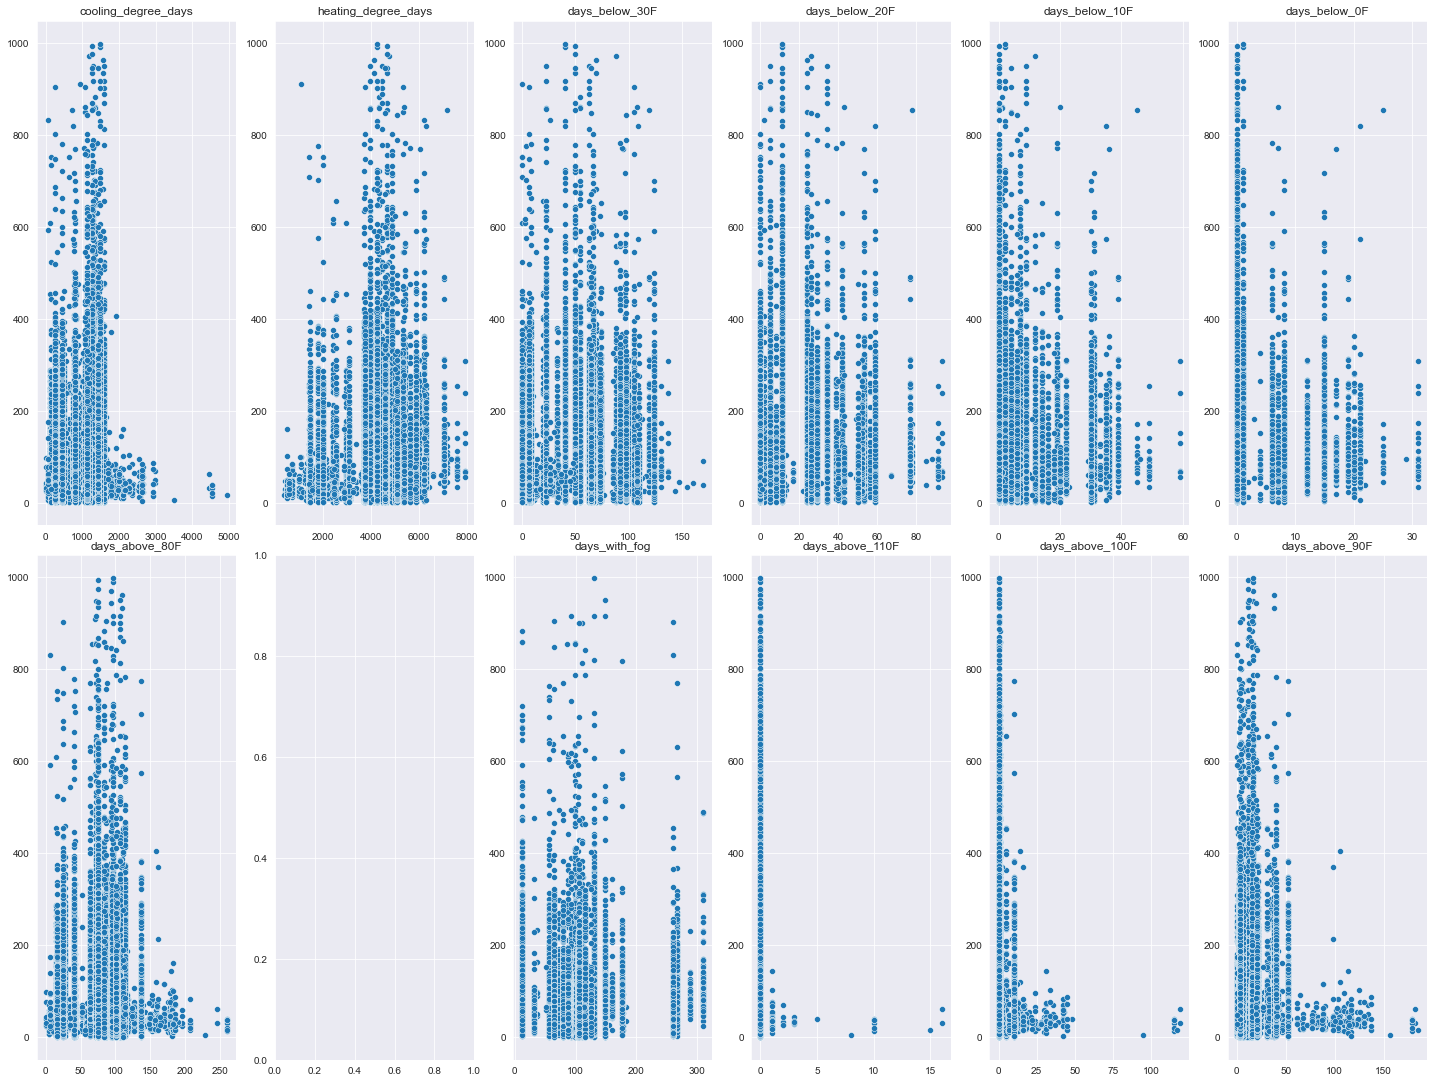

In [37]:
fig,ax=plt.subplots(2,6,figsize=(20,15))
fig.tight_layout()
for i,col in enumerate(days_col):
    if i<6:
        sns.scatterplot(x=df[col],y=df["site_eui"],ax=ax[0,i]).set(title=col,xlabel=None,ylabel=None);
    else:
        sns.scatterplot(x=df[col],y=df["site_eui"],ax=ax[1,6-i]).set(title=col,xlabel=None,ylabel=None);
    

In [48]:
df["State_Factor"]=df["State_Factor"].str[-1].astype(int)

In [50]:
df["building_class"]=df["building_class"].replace(["Commercial","Residential"],[0,1])

In [57]:
condition=["!df['facility_type']=='Laboratory'","!df['facility_type']=='Data_Center'","! 'Health' in df['facility_type']"]
exp=[3,4,2]
df["facility_type_ch"]=df["facility_type"].where(condition,exp,axis=1)

ValueError: Array conditional must be same shape as self

In [62]:
for i in range(0,len(df["facility_type"])):
    if(df.iloc[i,3]=="Laboratory"):
        df.iloc[i,3]=3
    elif (df.iloc[i,3]=="Data_Center"):
        df.iloc[i,3]=4
    elif("Health" in df.iloc[i,3]):
        df.iloc[i,3]=2
    else:
        df.iloc[i,3]=1
df.head(20)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,1,0,1,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,1,0,1,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,1,0,1,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,1,0,1,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,1,0,1,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
5,1,1,0,1,119900.0,1956.0,NaN,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,6.597715,5
6,1,1,0,1,91367.0,1982.0,56.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,12.817841,6
7,1,1,0,1,50422.0,1947.0,99.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,22.392014,7
8,1,1,0,1,122020.0,1929.0,98.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,28.199578,8
9,1,1,0,1,102612.0,1979.0,83.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,29.515952,9


In [63]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_knn=imputer.fit_transform(df.drop("id",axis=1))

In [74]:
columns=list(df.columns)
columns.remove("id")
df_impute=pd.DataFrame(df_knn,columns=columns)

In [75]:
df_impute.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,1.0,1.0,0.0,1.0,61242.0,1942.0,11.0,2.4,36.0,50.5,...,0.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,191.8,248.682615
1,1.0,1.0,0.0,1.0,274000.0,1955.0,45.0,1.8,36.0,50.5,...,0.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,12.0,26.500150
2,1.0,1.0,0.0,1.0,280025.0,1951.0,97.0,1.8,36.0,50.5,...,0.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,12.0,24.693619
3,1.0,1.0,0.0,1.0,55325.0,1980.0,46.0,1.8,36.0,50.5,...,0.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,12.0,48.406926
4,1.0,1.0,0.0,1.0,66000.0,1985.0,100.0,2.4,36.0,50.5,...,0.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,122.6,3.899395


In [76]:
df_impute.to_csv("C:\\Users\\hp\\Documents\\MGP\\Site_energy_predicton\\Dataset\\knn_data.csv")

In [9]:
df_imp=pd.read_csv("C:\\Users\\hp\\Documents\\MGP\\Site_energy_predicton\\Dataset\\knn_data.csv")
df_imp.head()

,Unnamed: 0,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,0,1.0,1.0,0.0,1.0,61242.0,1942.0,11.0,2.4,36.0,...,0.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,191.8,248.682615
1,1,1.0,1.0,0.0,1.0,274000.0,1955.0,45.0,1.8,36.0,...,0.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,12.0,26.500150
2,2,1.0,1.0,0.0,1.0,280025.0,1951.0,97.0,1.8,36.0,...,0.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,12.0,24.693619
3,3,1.0,1.0,0.0,1.0,55325.0,1980.0,46.0,1.8,36.0,...,0.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,12.0,48.406926
4,4,1.0,1.0,0.0,1.0,66000.0,1985.0,100.0,2.4,36.0,...,0.0,14.0,0.0,0.0,0.0,1.0,1.0,1.0,122.6,3.899395


In [10]:
df_imp=df_imp.drop("Unnamed: 0",axis=1)

In [11]:
df_imp[["year_built","direction_max_wind_speed","direction_peak_wind_speed","days_with_fog"]]=df_imp[["year_built","direction_max_wind_speed","direction_peak_wind_speed","days_with_fog"]].astype(int)

In [12]:
df_imp.describe()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
count,75757.000000,75757.000000,75757.000000,75757.000000,7.575700e+04,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,4.367755,4.931821,0.574970,1.011180,1.659839e+05,1952.071479,61.071999,39.506323,11.432343,34.310468,...,0.876764,82.709809,14.058701,0.279539,0.002442,70.570944,71.347955,4.393691,116.388809,82.584693
std,1.471441,2.070587,0.494351,0.126566,2.468758e+05,37.388860,24.662140,60.656596,9.381027,6.996108,...,2.894244,25.282913,10.943996,2.252323,0.142140,121.319258,123.845522,5.992169,53.604285,58.255403
min,1.000000,0.000000,0.000000,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169
25%,3.000000,4.000000,0.000000,1.000000,6.237900e+04,1927.000000,46.200000,11.900000,6.000000,29.827586,...,0.000000,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601
50%,5.000000,6.000000,1.000000,1.000000,9.136700e+04,1951.000000,64.000000,25.000000,11.000000,34.451613,...,0.000000,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,75.293716
75%,6.000000,6.000000,1.000000,1.000000,1.660000e+05,1976.000000,79.600000,42.700000,13.000000,37.322581,...,0.000000,97.000000,17.000000,0.000000,0.000000,66.000000,68.000000,4.460000,131.000000,97.277534
max,6.000000,8.000000,1.000000,4.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,...,31.000000,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120


In [13]:
df_imp["year_built"]=df_imp["year_built"].replace(0,1600)

In [14]:
df_imp["winter_avg_temp"]=df_imp[winter].mean(axis=1)
df_imp["spring_avg_temp"]=df_imp[spring].mean(axis=1)
df_imp["summer_avg_temp"]=df_imp[summer].mean(axis=1)
df_imp["autumn_avg_temp"]=df_imp[autumn].mean(axis=1)
df_imp["winter_min_temp"]=df_imp[winter_min].mean(axis=1)
#df_imp["spring_min_temp"]=df_imp[spring_min].mean(axis=1)
#df_imp["summer_min_temp"]=df_imp[summer_min].mean(axis=1)
#df_imp["autumn_min_temp"]=df_imp[autumn_min].mean(axis=1)
#df_imp["winter_max_temp"]=df_imp[winter_max].mean(axis=1)
#df_imp["spring_max_temp"]=df_imp[spring_max].mean(axis=1)
df_imp["summer_max_temp"]=df_imp[summer_max].mean(axis=1)
#df_imp["autumn_max_temp"]=df_imp[autumn_max].mean(axis=1)


In [15]:
df_new=df_imp.drop(temp,axis=1)

In [33]:
temp

['january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp',
 'avg_temp']

In [16]:
df_new[days_col]=df_new[days_col]/365

In [17]:
X=df_new.drop("site_eui",axis=1)
Y=df_new["site_eui"]

In [18]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
from sklearn.metrics import mean_squared_error
def score(model):
    model.fit(train_X,train_y)
    preds=model.predict(test_X)
    rmse=np.sqrt(mean_squared_error(test_y,preds))
    print(rmse)
    return rmse

In [50]:
from sklearn.ensemble import RandomForestRegressor
random_clf=RandomForestRegressor(n_estimators=1000,max_depth=10)
#score(random_clf)

In [75]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=1000,learning_rate=0.1)
score(xgb)

42.553704235627336


42.553704235627336

In [74]:
train_X.head()
#43.111791242886625
#42.64721438433502
#42.71803286522985

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,cooling_degree_days,heating_degree_days,...,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,winter_avg_temp,spring_avg_temp,summer_avg_temp,autumn_avg_temp,winter_min_temp,summer_max_temp
50443,5.0,6.0,1.0,1.0,78390.0,1927,54.4,25.6,4.331507,12.219178,...,330,340,18.30,0.405479,34.858487,46.173387,74.364382,63.616667,14.666667,92.25
12335,6.0,4.0,0.0,1.0,141329.0,1903,29.0,189.0,3.808219,14.893151,...,70,72,4.46,0.454795,26.502412,46.766685,72.668011,59.023851,-3.000000,96.25
56075,6.0,6.0,1.0,1.0,87961.0,2006,42.0,3.4,4.079452,11.649315,...,1,1,1.00,0.290411,36.832406,51.102151,73.223790,60.783333,9.000000,93.00
53059,6.0,6.0,1.0,1.0,356000.0,1948,89.0,3.4,4.079452,11.649315,...,1,1,1.00,0.243836,36.832406,51.102151,73.223790,60.783333,9.000000,93.00
38154,4.0,6.0,0.0,1.0,71500.0,2009,67.0,42.7,3.090411,13.356164,...,1,1,1.00,0.178082,33.579301,44.997312,71.777823,57.516667,12.333333,89.00


In [79]:
feat=pd.DataFrame([X.columns,xgb.feature_importances_])
feat=feat.transpose()
feat.columns=["features_name","feature_importances"]
feat.head()

,features_name,feature_importances
0,Year_Factor,0.009885
1,State_Factor,0.036303
2,building_class,0.034484
3,facility_type,0.293512
4,floor_area,0.023072


In [81]:
feat_imp=feat.sort_values(by="feature_importances",ascending=True,axis=0)
feat_imp.head()

,features_name,feature_importances
20,days_above_110F,0.00033
22,direction_peak_wind_speed,0.008478
0,Year_Factor,0.009885
19,days_above_100F,0.011082
30,summer_max_temp,0.013252


<BarContainer object of 31 artists>

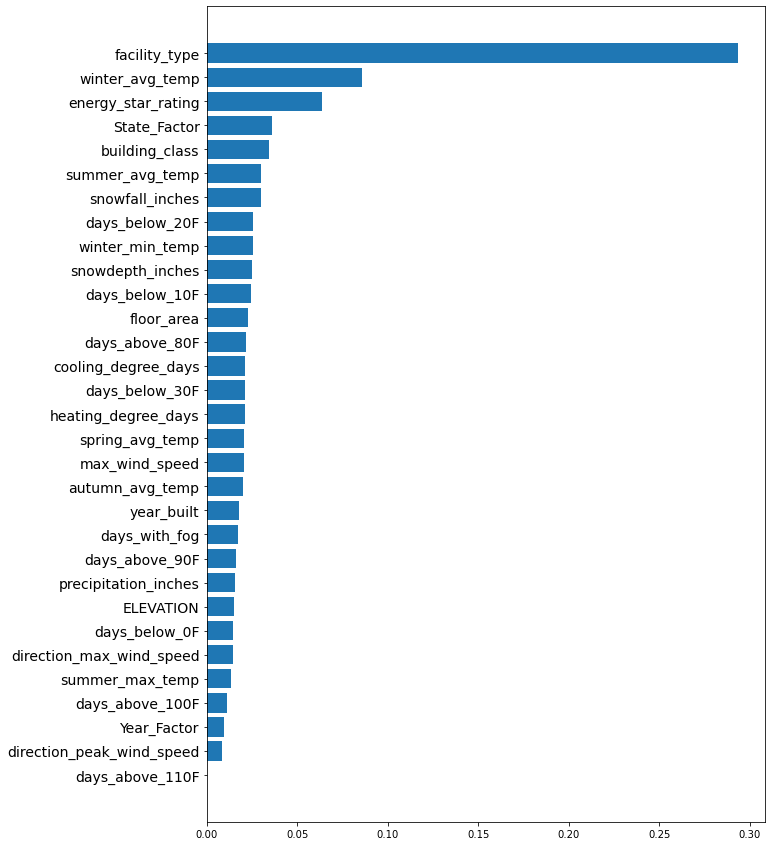

In [85]:
plt.figure(figsize=(10,15))

plt.yticks(fontsize=14)
plt.barh(feat_imp["features_name"],feat_imp["feature_importances"])

In [20]:
columns=["facility_type","energy_star_rating","State_Factor","building_class","winter_avg_temp","summer_avg_temp","year_built","winter_min_temp","summer_max_temp","snowfall_inches","floor_area","ELEVATION"]
df_app=df_new[columns]

,facility_type,energy_star_rating,State_Factor,building_class,winter_avg_temp,summer_avg_temp,year_built,winter_min_temp,summer_max_temp,snowfall_inches,floor_area,ELEVATION
0,1.0,11.0,1.0,0.0,50.121160,60.560484,1942,35.666667,85.75,0.0,61242.0,2.4
1,1.0,45.0,1.0,0.0,50.121160,60.560484,1955,35.666667,85.75,0.0,274000.0,1.8
2,1.0,97.0,1.0,0.0,50.121160,60.560484,1951,35.666667,85.75,0.0,280025.0,1.8
3,1.0,46.0,1.0,0.0,50.121160,60.560484,1980,35.666667,85.75,0.0,55325.0,1.8
4,1.0,100.0,1.0,0.0,50.121160,60.560484,1985,35.666667,85.75,0.0,66000.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...
75752,1.0,8.0,1.0,0.0,43.218762,64.581183,1995,28.666667,89.25,1.4,20410.0,36.6
75753,1.0,98.0,1.0,1.0,43.218762,64.581183,1910,28.666667,89.25,1.4,40489.0,36.6
75754,1.0,52.0,1.0,0.0,36.196515,57.187366,1917,23.666667,83.25,36.6,28072.0,36.6
75755,1.0,56.0,1.0,0.0,36.196515,57.187366,2012,23.666667,83.25,36.6,53575.0,36.6


In [24]:
from xgboost import XGBRegressor
xgb_app=XGBRegressor(n_estimators=1000,learning_rate=0.1)
xgb_app.fit(df_app,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [26]:
import joblib as jb
jb.dump(xgb_app,"C:\\Users\\hp\\Documents\\MGP\\Site_energy_predicton\\Model\\model.joblib")

['C:\\Users\\hp\\Documents\\MGP\\Site_energy_predicton\\Model\\model.joblib']